<a href="https://colab.research.google.com/github/zainabzafari/Calculator-Project/blob/master/Project_regression_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression using the life expectancy dataset.

Linear regression is a very common technique to link a set of features of real valued variables $\mathbf{x}=(x_1, \ldots, x_d)$ to a real value outcome $y$. The hypothesis with the linear regression model is that the outcome variable is a linear combination of the features, to with a gaussian noise is added:

$$
\begin{align}
Y  & = w_0 + \sum_{i=1}^{d} w_i \cdot x_i  + \varepsilon, & \varepsilon &\sim \mathcal{N}(0, \sigma^2)\\
Y & = \mathbf{\tilde{X}}^{T} \cdot \mathbf{W}  & \mathbf{\tilde{X}}^T &= (1, X_1, X_2, \ldots, X_d)
\end{align}
$$

The goal of this project is to explore the different aspects of linear regression on a traditional multivariate dataset from the Global Health Observatory (GPO) from the World Health Organization (WHO) which keeps track of the health status as well as many other related factors for all countries. The data-set relates life expectancy, to different health factors for 193 countries and as been collected from the same WHO data repository website and its corresponding economic data was collected from the United Nation website. The different datasets were merged and made available on the [Kaggle platform](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who) which is what we use now.

After a little of data cleaning and exploiration, we will estimate parameters of the model and evaluate its predictive power. We will use linear regression and regularized (ridge) regression.


The project is divided into the following tasks:
  1. Data loading, cleaning.
  2. Short dive into data exploration.
  3. Implementation of linear regression, relationship with correlation, and interpretation of the coefficients.
  4. Regularization using ridge regression and the effect of the regularization parameter on the fit.
  5. Comparison of the different models by assessing the quality of their prediction.
  6. (optional) Reproduction of the analysis within the `sklearn` framework and extension of the results.

## Task 1: Data loading and cleaning

### Data loading
We start by reading in the data table, have a look at the first rows, and clean up possible mistyping in column names.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import matplotlib.cm as cm
import matplotlib.colors as colors


In [ ]:

# Use pandas.read_csv() method
data = pd.read_csv('/content/data.csv')

## 2938 observations, 22 features
print("Size of the table: ", data.shape)
# display first 20 rows
data.head(20)

Size of the table:  (2938, 22)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


Some columns are hidden due to their number. We can print all of the columns with ```pandas.DataFrame.columns```:

In [ ]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

After taking a good look at the column labels, you may notice that some trailing whitespace are remaining on the column names (_e. g._ `'Measles '`). <br>
Use the  [```.strip()``` method](https://docs.python.org/3.4/library/stdtypes.html#str.strip) to clean up column names

In [ ]:

data.columns = data.columns.str.strip()
print(f'\n Columns stripped: {data.columns}')


 Columns stripped: Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


### Data Cleaning

We will perform an additional cleaning step on the dataset by handling missing values.
Proper preprocessing of the columns ensure that we will be able to make the most of the data (even if it comes at the cost of altering it a little). We will identify columns with missing data, and apply a simple technique of filling the real missing values with the mean of the same countries (e.g., mean imputation, forward fill, or regression-based imputation).

We are using a simple method, but multiple other techniques exist and  can be applied (check the method [`pandas.DataFrame.fillna`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna)):
  - mean imputation, we fill the missing values with the means of the corresponding columns. We will use this method after a grouping by country.
  - forward fill, we fill each missing value based on the last valid observation. This is a general technique that works with any data type.
  - regression based imputation is directly related to the theme of this project, so we will avoid it at this step.

Here, we will only work with columns containing real values and we will use the mean of each country to fill the missing value.

In [ ]:
# Identify columns with missing values and report their count
missing_data = data.isna().sum()
print(missing_data)

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64


In [ ]:
# Fill missing values with mean for numeric columns
# Compute a mean for each country to fill the data
numeric_columns = data.select_dtypes(include=[np.number]).columns.difference(['Year'])
country_means = data.groupby('Country')[numeric_columns].mean()
for col in numeric_columns:
    data[col] = data[col].fillna(data['Country'].map(country_means[col]))


print(data.isna().sum())

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64


## Task 2: Data visualization and exploration

It is also important to visualize first the basic properties of the data by simply looking at it. (It is crucial for accurate modeling and analysis).
Here, we will simply produce boxplots as one dimensional summary plots of a few variables, and then assess some of the interaction between the variables with a pair plot. Exploratory data analysis of such a data set could be possible but would require a complete separate project.

### Boxplots as a visualization tool

Use boxplots to summarize the distributions for the variables `Life Expectancy`, `BMI`, and `GDP`.

You should observe a few number of outliers for `Life Expectancy` and `GDP`. Have a look at the properties of the outliers and characterize them rapidly.

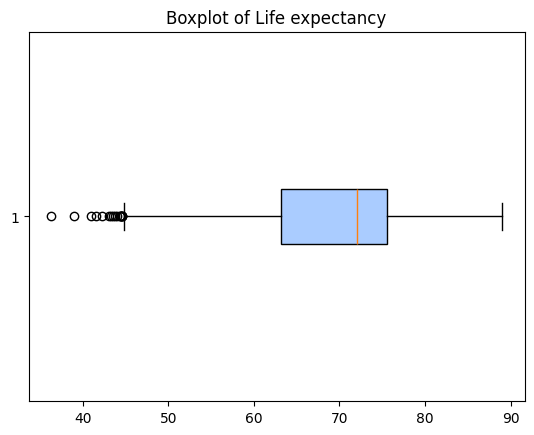

count    2938.000000
mean       69.224932
std         9.507640
min        36.300000
25%        63.200000
50%        72.000000
75%        75.600000
max        89.000000
Name: Life expectancy, dtype: float64


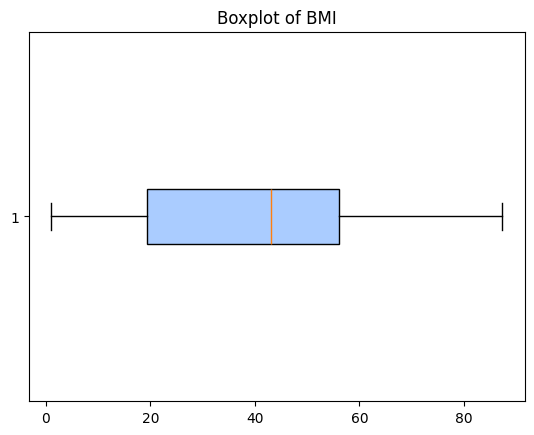

count    2938.000000
mean       38.321247
std        19.927677
min         1.000000
25%        19.400000
50%        43.000000
75%        56.100000
max        87.300000
Name: BMI, dtype: float64


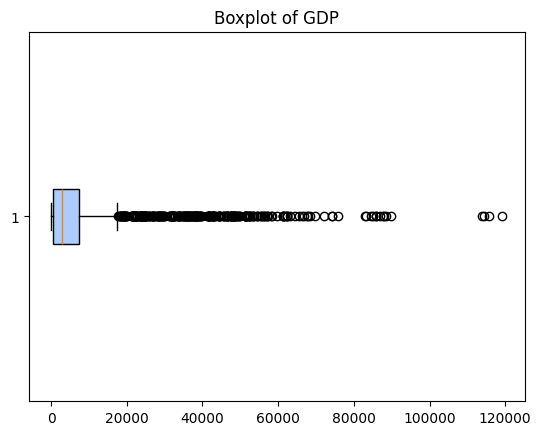

count      2938.000000
mean       7378.404536
std       13158.707178
min           1.681350
25%         562.082880
50%        2834.764218
75%        7378.404536
max      119172.741800
Name: GDP, dtype: float64


In [ ]:
# Boxplot to detect outliers
key_variables = ['Life expectancy', 'BMI', 'GDP']
for var in key_variables:
    box = plt.boxplot(data[var], vert=False, patch_artist=True)
    plt.title(f'Boxplot of {var}')
    for b in box['boxes']:
        b.set_facecolor('#AACCFF')
    plt.show()
    print(data[var].describe())


In [ ]:
# Inspect the outliers of Life expectancy

# find the 5th and 95th percentiles
life_expectancy_5th = data['Life expectancy'].quantile(0.05)
life_expectancy_95th = data['Life expectancy'].quantile(0.95)

print("Countries with low life expectancies:",data[(data['Life expectancy'] < life_expectancy_5th)]['Country'].unique())
print("Countries with high life expectancies:",data[(data['Life expectancy'] > life_expectancy_95th)]['Country'].unique())

Countries with low life expectancies: ['Angola' 'Botswana' 'Burkina Faso' 'Burundi' "Côte d'Ivoire"
 'Central African Republic' 'Chad' 'Democratic Republic of the Congo'
 'Eritrea' 'Ethiopia' 'Haiti' 'Lesotho' 'Liberia' 'Malawi' 'Mali'
 'Mozambique' 'Niger' 'Nigeria' 'Rwanda' 'Sierra Leone' 'Somalia'
 'South Sudan' 'Swaziland' 'Uganda' 'United Republic of Tanzania' 'Zambia'
 'Zimbabwe']
Countries with high life expectancies: ['Australia' 'Austria' 'Belgium' 'Canada' 'Chile' 'Cyprus' 'Denmark'
 'Finland' 'France' 'Germany' 'Greece' 'Iceland' 'Ireland' 'Israel'
 'Italy' 'Japan' 'Luxembourg' 'Malta' 'Netherlands' 'New Zealand' 'Norway'
 'Portugal' 'Republic of Korea' 'Singapore' 'Slovenia' 'Spain' 'Sweden'
 'Switzerland' 'United Kingdom of Great Britain and Northern Ireland']


In [ ]:
# Inspect the outliers of BMI

# find the 5th and 95th percentiles
bmi_5th = data['BMI'].quantile(0.05)
bmi_95th = data['BMI'].quantile(0.95)

print("Countries with low BMI:",data[(data['BMI'] < bmi_5th)]['Country'].unique())
print("Countries with high BMI:",data[(data['BMI'] > bmi_95th)]['Country'].unique())

Countries with low BMI: ['Angola' 'Antigua and Barbuda' 'Armenia' 'Austria' 'Bangladesh' 'Belize'
 'Benin' 'Bhutan' 'Botswana' 'Brunei Darussalam' "Côte d'Ivoire"
 'Cabo Verde' 'Cameroon' 'Central African Republic' 'China' 'Comoros'
 'Congo' "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Djibouti' 'Ecuador' 'El Salvador'
 'Equatorial Guinea' 'Gabon' 'Gambia' 'Ghana' 'Grenada' 'Guatemala'
 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Indonesia' 'Iraq'
 'Kenya' 'Kyrgyzstan' "Lao People's Democratic Republic" 'Lesotho'
 'Liberia' 'Madagascar' 'Malaysia' 'Maldives' 'Mali' 'Mauritania'
 'Mauritius' 'Mongolia' 'Mozambique' 'Myanmar' 'Namibia' 'Nigeria' 'Oman'
 'Pakistan' 'Papua New Guinea' 'Paraguay' 'Philippines' 'Portugal'
 'Republic of Korea' 'Rwanda' 'Saint Lucia'
 'Saint Vincent and the Grenadines' 'Sao Tome and Principe' 'Senegal'
 'Seychelles' 'Sierra Leone' 'Singapore' 'Solomon Islands' 'Somalia'
 'South Africa' 'Sri Lanka' 'Swaziland' 'Tajikist

In [ ]:
# Inspect the outliers of GDP

# find the 5th and 95th percentiles
gdp_5th = data['GDP'].quantile(0.05)
gdp_95th = data['GDP'].quantile(0.95)

print("Countries with low GDP:",data[(data['GDP'] < bmi_5th)]['Country'].unique())
print("Countries with high GDP:",data[(data['GDP'] > bmi_95th)]['Country'].unique())

Countries with low GDP: ['Bangladesh' 'Cambodia' 'Philippines']
Countries with high GDP: ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' "Côte d'Ivoire" 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana'

### line plots and Pair plots

- First check how the life expectancy evolved for a few countries with a line plot.
- Produce a pair plot of the variables `Life expectancy`, `BMI`, `GDP`, `Alcohol`, and `Schooling`. You can consider using the `Status` of the country or the `Year` as a way to color the plot. (seaborn function `pairplot` with `hue` option).

- What do you observe at a first visualization on the data? For instance you can comment on:
  - The relationship between `Life expectancy` and `Status`,
  - The relationship between `Life expectancy` and `Schooling`,
  - The distribution of `BMI`.


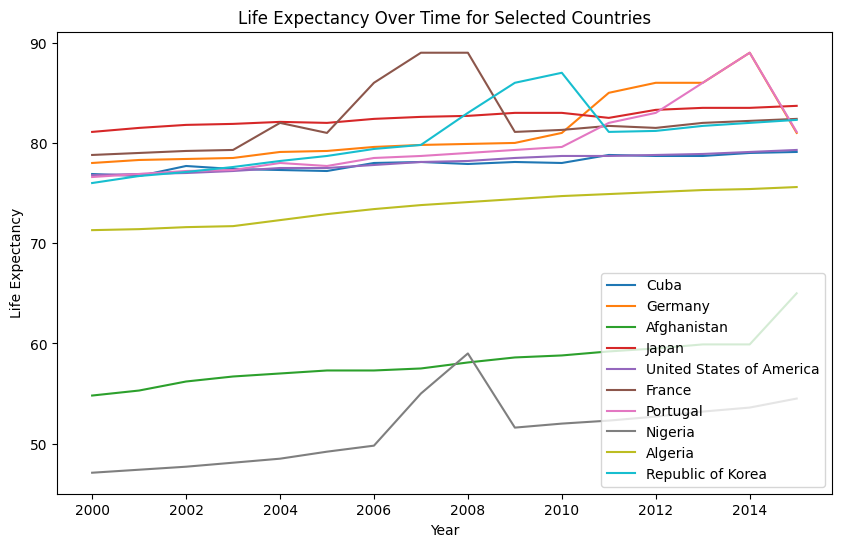

In [ ]:
countries = data.Country.unique()
### Example of countries but you can select an other set
cchoices = ['Cuba','Germany', 'Afghanistan', 'Japan', 'United States of America' ,
           'France', 'Portugal', 'Nigeria', 'Algeria', 'Republic of Korea']

plt.figure(figsize=(10, 6))
for country in cchoices:
    country_data = data[data['Country'] == country]
    plt.plot(country_data['Year'], country_data['Life expectancy'],label=country)
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy Over Time for Selected Countries')
plt.legend(loc='lower right')
plt.show()





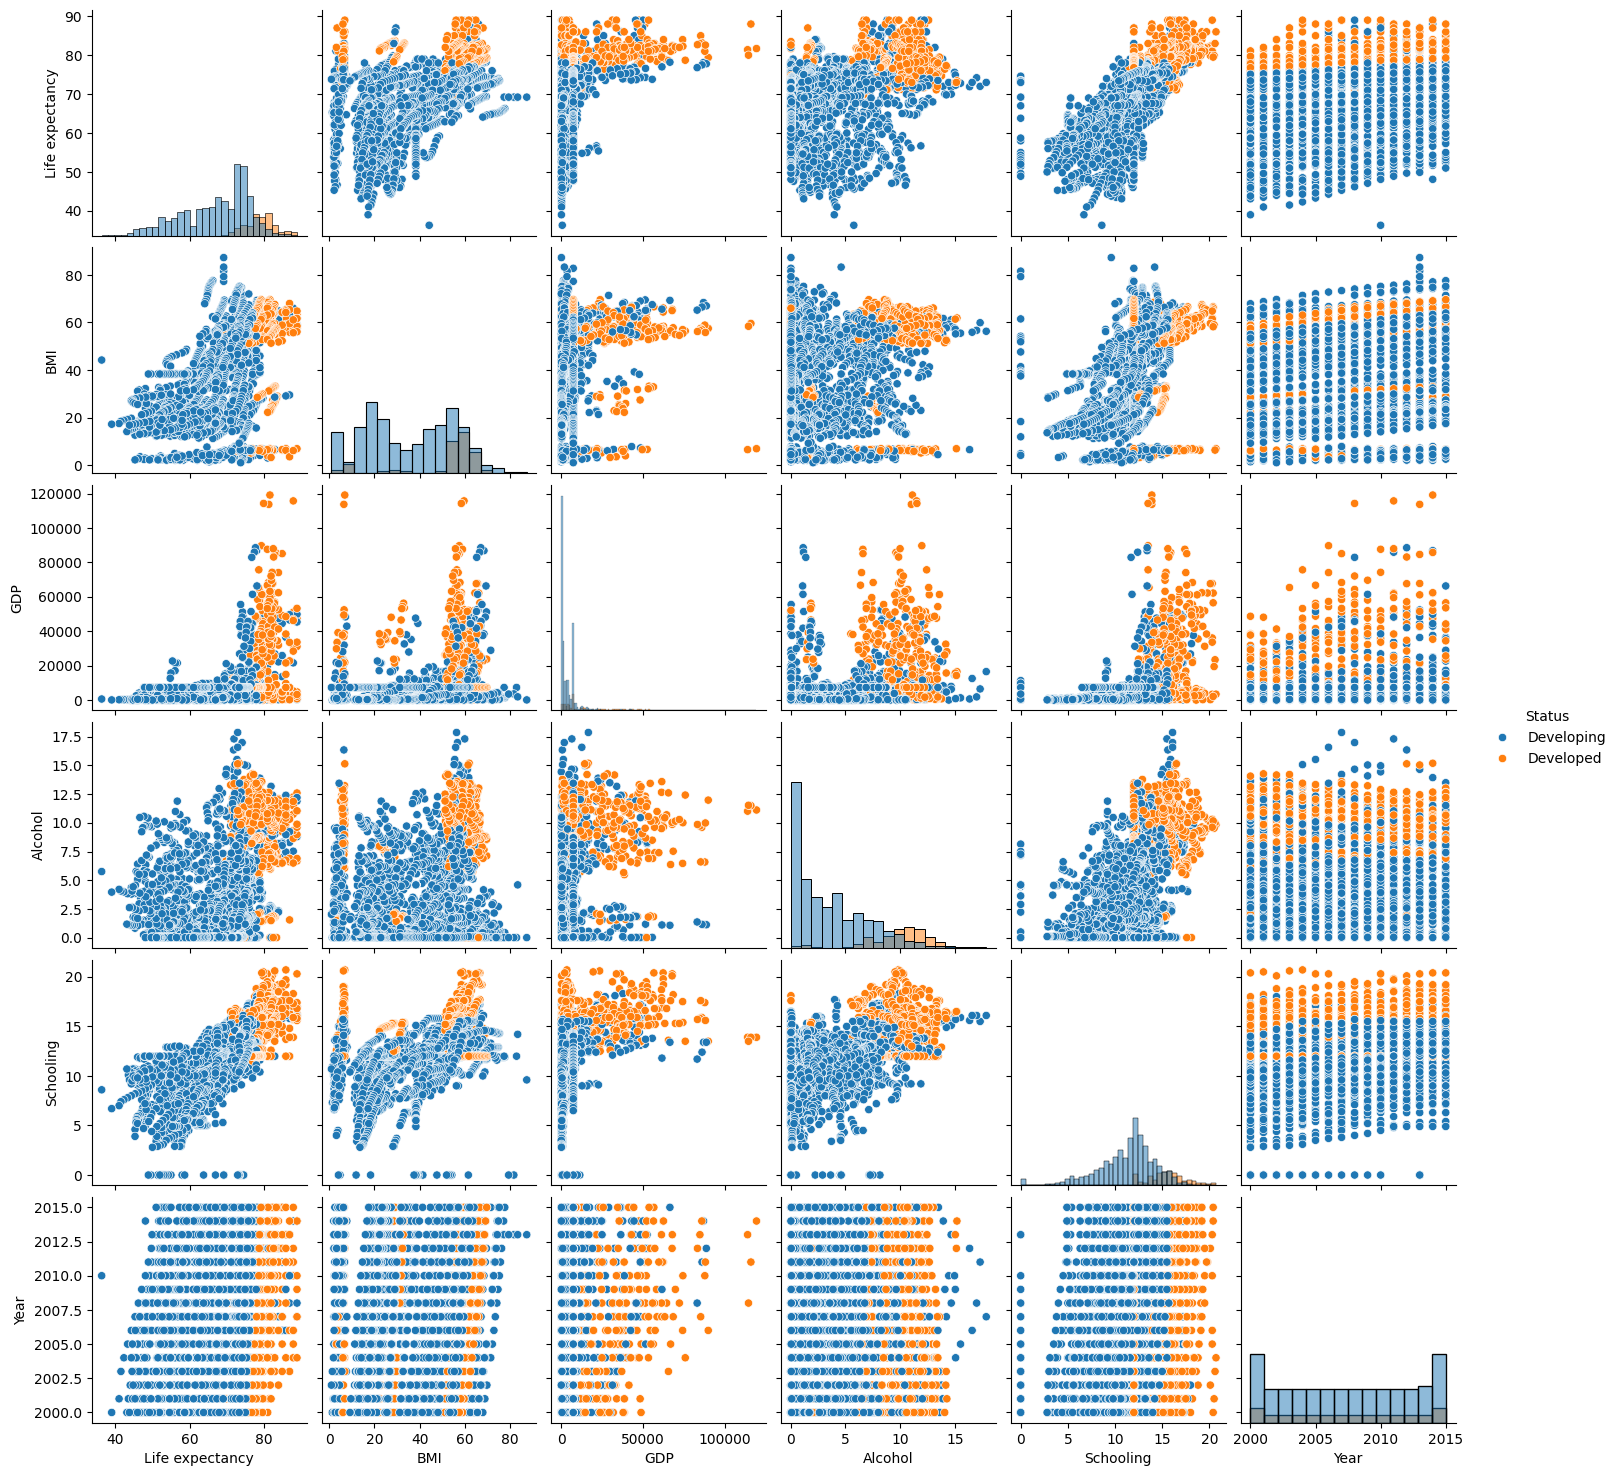

In [ ]:
import seaborn as sns
variables = ['Life expectancy', 'BMI', 'GDP', 'Alcohol', 'Schooling', 'Status', 'Year']

#filtered_data = data[data['Country'].isin(cchoices)]

# Generate pairplot with "Status" as the hue (color differentiation)
sns.pairplot(data[variables], hue='Status', diag_kind='hist')
plt.show()



schooling has positive relationship with life expectency
the relationship of BMI is not clear
-no clear relationship between live expectency and alchool

-positive relation between GDP and BMI(Wealthy countries higher BMI)

-positive relationship between schooling and BMI

## Task 3: Correlation and Its Interpretation

### Description
This task focuses on working first the computation of the variable correlations and understanding how it relates to regression coefficients. The standard correlation measure can identify key relationships in the data but must be interpreted with care.

### Question:
   - Compute the correlation between `Life Expectancy` and the following variables. Is positive or negative?
     - `Alcohol` consumption.
     - `Schooling`.
     - `BMI`.
   - Do you find some of the correlation values to be unusual? Again, split the data by some characteristic, such as the variable `Status` and explain the results obtained.

In [ ]:
# TODO: Your code goes here

variables2 = ['Alcohol', 'Schooling', 'BMI']
for var in variables2:
    corr = data['Life expectancy'].corr(data[var])
    print(f'Life expectancy and {var}: {corr}')





Life expectancy and Alcohol: 0.4041550128738243
Life expectancy and Schooling: 0.7150663398620056
Life expectancy and BMI: 0.5592553046406489


In [ ]:
##
developed = data[data['Status'] == 'Developed']
developing = data[data['Status'] == 'Developing']

## report the correlations after stratification
correlations = {}
for var in variables2:
  correlations[var] = {
    'Developed':developed['Life expectancy'].corr(developed[var]),
    'developing':developing['Life expectancy'].corr(developing[var])

  }

df_correlations = pd.DataFrame(correlations).T
print('Correlation between Life expectancy and' + str(variables2))
print(df_correlations)

Correlation between Life expectancy and['Alcohol', 'Schooling', 'BMI']
           Developed  developing
Alcohol    -0.280381    0.200612
Schooling   0.351472    0.647412
BMI        -0.043962    0.545419


## Task 3: Simple Regression Implementation

### Description
This task involves implementing a simple linear regression model. To simplify the application of the model we will implement it as a regression class that contains one attribute `self.coefficients` that corresponds to the vector $\mathbf{W}$ (with the term for the bias $w_0$ being the first value).

You are required to complete the code for a regression class that includes methods for fitting, predicting, and evaluating the model.

We make the hypothesis that the matrix of correlations is of full rank.  



### Exercise
#### **Complete the Class**:
   - Fill in the missing methods (`fit`, `predict`, and `evaluate`) in the provided `LinRegModel` class (the `__str__` method is provided). Note that the solution of the linear regression is provided in the lecture slides.
   - For the evaluate method, it will compute two indicators:
     - the Mean Squared Error `MSE`:
      $$
      \frac{1}{n} \sum_{i=1}^{n} (y_i - \mathbf{X}^T_i\cdot \mathbf{W})^2
      $$
     - the R squared `rsquared` ($\bar{y}$ is the sample mean $\bar{y} = \frac{1}{n}\sum_i y_i$):
      $$
      R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \mathbf{X}^T_i\cdot \mathbf{W})^2 }{\sum_i{(y_i - \bar{y})^2} }
      $$
   - Ensure the implementation follows the principles of linear regression using the closed-form solution.


In [ ]:


class LinRegModel:
    def __init__(self):
        """Initialize the Linear Regression model."""
        self.coefficients = None
        self.variables = None

    def __str__(self):
        """ summary of the coefficients """
        return "Coefficients:\n" + str(self.coefficients) + "\nVariables: " + ", ".join(self.variables)


    def fit(self, X, y):
        """
        Train the linear regression model using the closed-form solution.

        Parameters:
        X: np.ndarray
            The feature matrix (shape: (n_samples, n_features)).
        y: np.ndarray
            The target vector (shape: (n_samples)).
        """
        ##The following code prepares the matrix X and the varnames
        ##Be careful with the automatic type change between pandas and numpy arrays
        Xtilde = np.hstack((np.ones((X.shape[0],1)),X ))
        varnames = ["bias"] + list(X.columns)
        self.variables = varnames
        ### Your code here.
        self.coefficients = np.linalg.inv(Xtilde.T @ Xtilde)@Xtilde.T @ y


    def predict(self, X):
        """
        Make predictions using the trained model.

        Parameters:
        X: np.ndarray
            The feature matrix (shape: [n_samples, n_features]).

        Returns:
        np.ndarray
            The predicted values (shape: [n_samples]).
        """
        #Your code here
        Xtilde = np.hstack((np.ones((X.shape[0],1)),X ))
        y_pred = Xtilde @ self.coefficients
        return y_pred

    def evaluate(self, X, y):
        """
        Evaluate the model using Mean Squared Error and R-squared metrics.

        Parameters:
        X: np.ndarray
            The feature matrix (shape: [n_samples, n_features]).
        y: np.ndarray
            The true target values (shape: [n_samples]).

        Returns:
        dict
            A dictionary with MSE and R-squared metrics.
        """
        ##Your code here
        y_pred = self.predict(X)
        MSE = np.mean((y - y_pred)**2)
        y_mean = np.mean(y)
        rsquared = 1 - np.sum((y - self.predict(X))**2) / np.sum((y - y_mean)**2)

        return {'MSE': MSE, 'rsquared': rsquared}



In [ ]:
### You can test the estimation of the model
variables = ['Alcohol', 'Schooling', 'BMI']
vout = ['Life expectancy']
Xtest = data[variables]
y = data[vout]

lm = LinRegModel()

lm.fit(Xtest, y)

## Tests
print(lm)


Coefficients:
   Life expectancy
0        44.302265
1         0.065336
2         1.654260
3         0.124810
Variables: bias, Alcohol, Schooling, BMI


## Task 4: Regression Analysis and Evaluation

#### 1. Spliting  the Dataset
- We will divide the dataset into training and testing sets:
  - Use the first 7 years 2000 to 2006 as the **training set**.
  - Use the next three year 2007-2009 as the **testing set**.



In [ ]:
## Your code here
train_data = data[data['Year'] <= 2006]
test_data = data[(data['Year'] >= 2007) & (data['Year'] <= 2009) ]

print(f"Training set size: {train_data.shape}")
print(f"Testing set size: {test_data.shape}")

Training set size: (1281, 22)
Testing set size: (549, 22)


#### 2. Experiment with Predictor Sets
- Use different combinations of predictors to train and evaluate the regression model. Below are some suggested sets of predictors:

  **Set A (Healthcare and Mortality)**:
  - `Adult Mortality`, `Infant deaths`, `Total expenditure`

  **Set B (Lifestyle and Education)**:
  - `Alcohol`, `BMI`, `Schooling`

  **Set C (Economic Factors)**:
  - `GDP`, `Income composition of resources`, `Population`

  **Set D**
  - Union of set A, set B, and set C


- Train the model on each predictor set using the **training data** and evaluate its performance on the **testing data**.
- **Deliverable**: For each predictor set, report:
  - Mean Squared Error (MSE)
  - $R^2$ score
  - A brief explanation of the observed performance and an analysis of the coefficients



In [ ]:
## Predictor variables

predictors_sets = {
    "Set A": ["Adult Mortality", "infant deaths", "Total expenditure"],
    "Set B": ["Alcohol", "BMI", "Schooling"],
    "Set C": ["GDP", "Income composition of resources", "Population"]
}

predictors_sets["Set D"] = [x for l_var in predictors_sets.values() for x in l_var]


## Running the models
## Your code here

results = {}
for set_name, predictors in predictors_sets.items():
    X_train = train_data[predictors]
    y_train = train_data['Life expectancy']
    X_test = test_data[predictors]
    y_test = test_data['Life expectancy']
    lm = LinRegModel()
    lm.fit(X_train, y_train)
    results[set_name] = lm.evaluate(X_test, y_test)

results = pd.DataFrame(results).T

print(results)


             MSE  rsquared
Set A  40.028580  0.532757
Set B  37.247422  0.565220
Set C  43.009173  0.497965
Set D  22.021524  0.742948


#### 3. Analyze the Best Model

From the results you obtained above you can now answer the following questions:

  1. Identify which predictor set yielded the best performance.
  2.  Answer the following questions:
  - What are the most significant predictors based on this analysis?
  - How does the inclusion or exclusion of certain variables affect model performance?
  - For countries with low life expectancy (<65), based on the coefficients estimated for each variable prediction, comment the effect of their change on lifespan?


**your answers here**

Predictor
1. D"the combination of all predictors A,B,C" performed better. smallest MSE, and Highest R-squared

2. a) per individual predictors, set B"Alcohol, BMI,Schooling" is the best"lowest MSE and greatest R-squared"
  b) inclusion of all set increases the accuracy, and performance.
     -exclusion of set B highly negative impact the prediction
     -exclusion of set C has the lowest impact on prediction
     -exclustion of set A in the middle







#### 4. Residual analysis

Residual analysis is an essential part of validating and understanding your linear regression model. Residuals
(the difference between observed and predicted values) help you assess how well your model fits the data,
identify patterns in the errors, and detect outliers or influential points.

For this part it is enough to consider only the model built with the set A of variables.

Residuals $e_i$ are defined in the following way:
$$
e_i = Y - \mathbf{W}\cdot \tilde{\mathbf{X}}
$$

Many diagnostic plots can be made from the study of the residuals, we will only concentrate visualising if the gaussian assumption for the noise $e_i \sim \mathcal{N}(0, \sigma^2)$ is fullfilled.

#### Questions

   1. Plot the predicted values $\hat{y_i}$ against the square-root of the residuals $\sqrt{e_i}$. What would you expect if the residuals are normally distributed?
   2.  An other way to assess the agreement with the normal distribution is to perform a [quantile-quantile plot](https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot) (or Q-Q plot). The quantile-quantile plot reports as a scatter plot the quantiles of your scaled residuals against the quantiles of a normal distribution. Do a Q-Q plot of the data points.


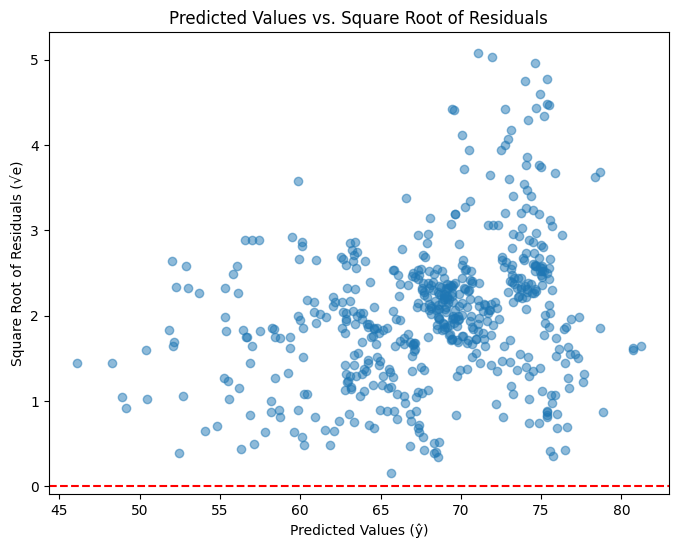

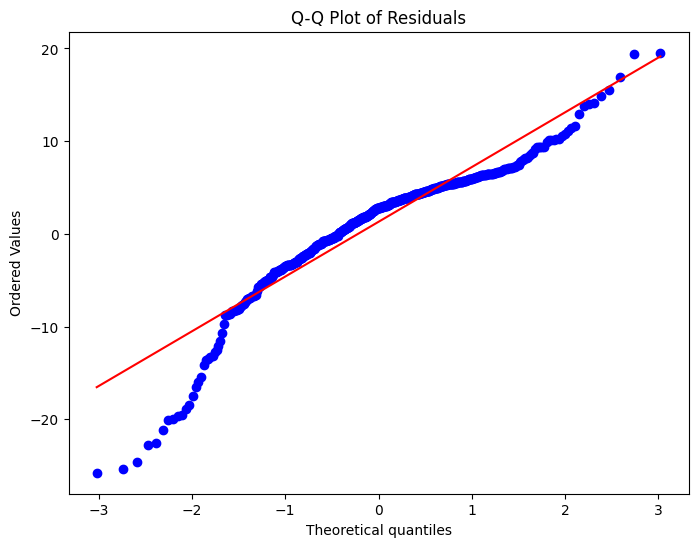

In [ ]:
## Your code here
import scipy.stats as stats

A = ["Adult Mortality", "infant deaths", "Total expenditure"]

X_train = train_data[A]
y_train = train_data["Life expectancy"]
X_test = test_data[A]
y_test = test_data["Life expectancy"]
lm_A = LinRegModel()
lm_A.fit(X_train, y_train)

# Get predictions and residuals
y_pred = lm_A.predict(X_test)
residuals = y_test - y_pred
sqrt_residuals = np.sqrt(np.abs(residuals))

# 1. Plot Predicted Values vs. Square Root of Residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, sqrt_residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values (ŷ)")
plt.ylabel("Square Root of Residuals (√e)")
plt.title("Predicted Values vs. Square Root of Residuals")
plt.show()

# 2. Q-Q Plot
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()


## Task 5: Regularization and Ridge Regression Implementation

### Description
This task focuses on implementing Ridge regression and analyzing the effects of regularization on model performance. You will compare Ridge regression results with standard linear regression and evaluate its impact on different predictor sets.

### Exercises

#### 1. **Implement Ridge Regression**:
   - Write a class `RidgeRegModel` that includes the same methods as the `LinRegModel` class.
     - `fit`: fit a Ridge regression model using the closed-form solution (see lecture slides).
     - `predict`: predict outcomes for a given dataset.
     - `evaluate`: evaluate the model performance using MSE and $R^2$ metrics.

  The class will have contain a regularization parameter `plambda` as an attribute. Note that we make use of class heritage to define `RidgeRegModel` so we do not need to redefine `predict` and `evaluate`.



In [ ]:

class RidgeRegModel(LinRegModel):
    def __init__(self):
        """Initialize the Linear Regression model."""
        self.coefficients = None
        self.variables = None
        self.plambda = None

    def __str__(self):
        """
        output
        """
        return f"Lambda: {self.plambda}\n" + super().__str__(self)

    def fit(self, X, y, plambda):
        """
        Train the linear regression model using the closed-form solution.

        Parameters:
        X: np.ndarray
            The feature matrix (shape: (n_samples, n_features)).
        y: np.ndarray
            The target vector (shape: (n_samples)).
        """
        self.plambda = plambda
        varnames = ["bias"] + list(X.columns)
        self.variables = varnames
        # your code here
        Xtilde = np.hstack((np.ones((X.shape[0],1)),X ))
        I = np.eye(Xtilde.shape[1])
        I[0,0] = 0 # do not regularize bias
        self.coefficients = np.linalg.inv(Xtilde.T @ Xtilde + plambda * I) @ Xtilde.T @ y




#### 2. **Train and Evaluate on Predictor Sets**:
   - Use the same predictor sets as in Task 4:
     - **Set A (Healthcare and Mortality)**
     - **Set B (Lifestyle and Education)**
     - **Set C (Economic Factors)**
     - **Set D (Union of A, B and C)**
   - Train and evaluate the `RidgeRegModel` on the training and testing sets for each predictor set for a value of `plambda`


In [ ]:
## Your code here
predictors_sets = {
    "Set A": ["Adult Mortality", "infant deaths", "Total expenditure"],
    "Set B": ["Alcohol", "BMI", "Schooling"],
    "Set C": ["GDP", "Income composition of resources", "Population"]
}

predictors_sets["Set D"] = [x for l_var in predictors_sets.values() for x in l_var]

plambda = 5
results_ridge = {}
for set_name, predictors in predictors_sets.items():
    X_train = train_data[predictors]
    y_train = train_data['Life expectancy']
    X_test = test_data[predictors]
    y_test = test_data['Life expectancy']
    r_lm = RidgeRegModel()
    r_lm.fit(X_train, y_train, plambda)
    results_ridge[set_name] = r_lm.evaluate(X_test, y_test)
    print(f"Results for {set_name}:")
    print(f"MSE: {results_ridge[set_name]['MSE']}")
    print(f"R-squared: {results_ridge[set_name]['rsquared']}")




Results for Set A:
MSE: 40.02754027433983
R-squared: 0.5327688041345902
Results for Set B:
MSE: 37.25150421306431
R-squared: 0.5651727600056122
Results for Set C:
MSE: 44.5577518593392
R-squared: 0.4798888079650654
Results for Set D:
MSE: 22.162537271026345
R-squared: 0.7413023952613051



#### 3. **Comparison**:
   1. Compare the performance of Ridge regression with standard linear regression for each predictor set, you can try first with parameters $\lambda=5$ and $\lambda =20$. What is the impact of increasing $\lambda$?
   2. For set D, Plot the values of the coefficients estimated, as well as the MSE, as a function of $\lambda$ from 0 to 40. What do you observe?
   3. Evaluate the effect of tuning the $\lambda$ parameter on model coefficients and metrics.
      - How does regularization impact the coefficients of highly correlated predictors?
      - Which model (standard linear regression or Ridge regression) performs better on the testing data? Why?
      - How does the choice of $\lambda$ influence the balance between bias and variance in the model?



In [ ]:
## lambda values
ridge_models = {}
ridge_results = {}

lambdas = [0, 5, 20]

## Predictor variables
predictors_sets = {
    "Set A": ["Adult Mortality", "infant deaths", "Total expenditure"],
    "Set B": ["Alcohol", "BMI", "Schooling"],
    "Set C": ["GDP", "Income composition of resources", "Population"]
}

predictors_sets["Set D"] = [x for l_var in predictors_sets.values() for x in l_var]

## Running the models

ridge_models = {
    "Set A": {l: RidgeRegModel() for l in lambdas},
    "Set B": {l: RidgeRegModel() for l in lambdas},
    "Set C": {l: RidgeRegModel() for l in lambdas},
    "Set D": {l: RidgeRegModel() for l in lambdas},
}

for i, models in ridge_models.items():
    for l, model in models.items():
        model.fit(train_data[predictors_sets[i]], train_data['Life expectancy'], l)

## Evaluate the models
for key, models in ridge_models.items():
    for l, model in models.items():
        ridge_results[(key, l)] = model.evaluate(test_data[predictors_sets[key]], test_data['Life expectancy'])

ridge_results = pd.DataFrame(ridge_results).T
ridge_results.index.names = ['Set', 'Lambda']
print(ridge_results)



                    MSE  rsquared
Set   Lambda                     
Set A 0       40.028580  0.532757
      5       40.027540  0.532769
      20      40.024448  0.532805
Set B 0       37.247422  0.565220
      5       37.251504  0.565173
      20      37.263754  0.565030
Set C 0       43.009173  0.497965
      5       44.557752  0.479889
      20      48.629801  0.432357
Set D 0       22.021524  0.742948
      5       22.162537  0.741302
      20      22.444039  0.738016


Index(['MSE', 'rsquared'], dtype='object')


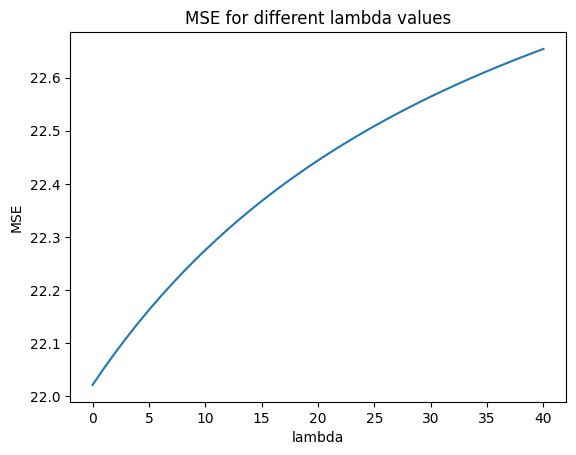

In [ ]:
running_lambda_model = RidgeRegModel()
lambdas = range(0, 41)
coefficients = []
results = []
for l in lambdas:
    running_lambda_model.fit(train_data[predictors_sets['Set D']], train_data['Life expectancy'], l)
    results.append(running_lambda_model.evaluate(test_data[predictors_sets['Set D']], test_data['Life expectancy']))
    coefficients.append(np.array([running_lambda_model.coefficients]))

# plot the mse and coefficient values
results = pd.DataFrame(results)
print(results.columns)
results['lambda'] = lambdas
results.set_index('lambda', inplace=True)
results['MSE'].plot()
plt.ylabel('MSE')
plt.title('MSE for different lambda values')
plt.show()